In [168]:
#import BINANCE_BTCUSDT, 240.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os
import sys
import math
import random

# Import the data
data = pd.read_csv('BINANCE_BTCUSDT, 60.csv')
data

,time,open,high,low,close,Plot,Plot.1,Plot.2,A组1,A组2,B组1,B组2,Volume
0,2024-01-21T23:00:00+09:00,41859.52,41881.39,41757.25,41787.50,41704.083758,41690.067338,42438.623998,42148.276798,42284.806515,43057.979392,42999.321683,630.51659
1,2024-01-22T00:00:00+09:00,41787.49,41860.00,41605.00,41656.28,41699.531020,41688.742345,42430.839481,42141.490635,42277.412086,43053.120815,42995.354056,978.43312
2,2024-01-22T01:00:00+09:00,41656.27,41673.06,41525.00,41607.18,41690.735684,41685.543821,42422.643864,42134.120833,42269.527002,43048.108889,42991.253099,791.19285
3,2024-01-22T02:00:00+09:00,41607.18,41695.07,41599.39,41678.00,41689.522762,41685.247985,42415.234473,42127.829511,42262.567861,43043.359811,42987.373474,481.67127
4,2024-01-22T03:00:00+09:00,41677.99,41729.77,41627.00,41681.09,41688.719642,41685.084927,42407.929553,42121.667587,42255.726945,43038.637905,42983.514438,467.73485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,2024-04-10T00:00:00+09:00,69358.32,69360.00,68535.03,69264.00,70577.817244,70451.736219,69093.467442,69376.731043,69231.605963,67811.724237,67301.604802,2890.83319
1898,2024-04-10T01:00:00+09:00,69264.00,69320.00,68516.15,68601.24,70389.571792,70379.167740,69088.569657,69366.034615,69224.189893,67814.460860,67305.444197,2409.92797
1899,2024-04-10T02:00:00+09:00,68601.25,68962.43,68210.00,68823.99,70240.468764,70318.180377,69085.937023,69358.558137,69219.481659,67817.960094,67309.930300,2349.39623
1900,2024-04-10T03:00:00+09:00,68823.99,69025.89,68769.79,68879.23,70110.826977,70261.750951,69083.880237,69351.946715,69215.478698,67821.638673,67314.566341,844.48608


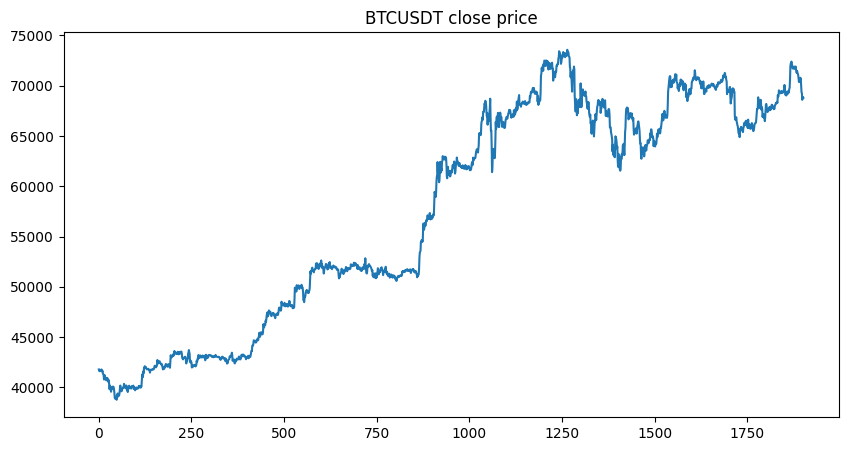

In [169]:
#plot close price
plt.figure(figsize=(10,5))
plt.plot(data['close'])
plt.title('BTCUSDT close price')
plt.show()


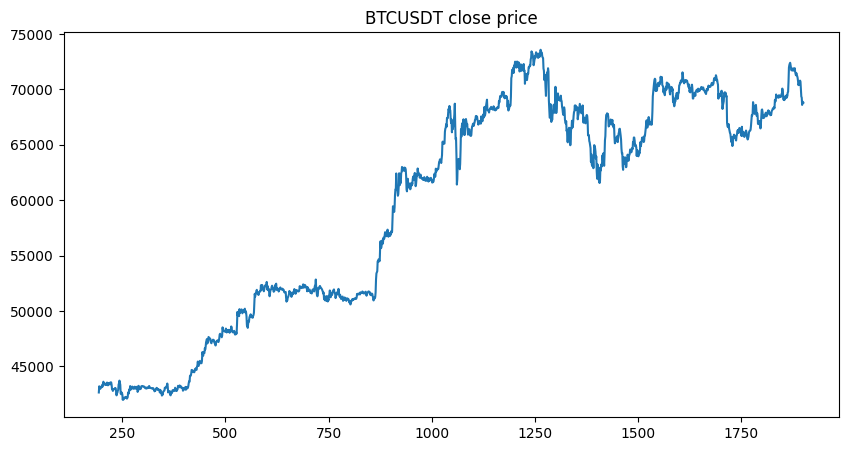

In [170]:
#convert timestamp to datetime
data['time'] = pd.to_datetime(data['time'])

#get only 2020 12 20 to 2021 03 20, time is in this format: 2020-01-14T01:00:00+09:00
# data1 = data[(data['time'] >= '2024-01-30T00:00:00+09:00') & (data['time'] <= '2021-03-20T00:00:00+09:00')]
data1 = data[(data['time'] >= '2024-01-30T00:00:00+09:00')]
#plot close price
plt.figure(figsize=(10,5))
plt.plot(data1['close'])
plt.title('BTCUSDT close price')
plt.show()

In [171]:
#check if any row like this:NaT	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	
data1.isnull().sum()
#drop rows with NaN
data1 = data1.dropna()
data1.isnull().sum()


time      0
open      0
high      0
low       0
close     0
Plot      0
Plot.1    0
Plot.2    0
A组1       0
A组2       0
B组1       0
B组2       0
Volume    0
dtype: int64

In [172]:
#show rows where time NaT
data1[data1['time'].isnull()]
# drop rows where time NaT
data1 = data1.dropna(subset=['time'])
data1.isnull().sum()



time      0
open      0
high      0
low       0
close     0
Plot      0
Plot.1    0
Plot.2    0
A组1       0
A组2       0
B组1       0
B组2       0
Volume    0
dtype: int64

In [173]:
#show all columns
data1.columns



Index(['time', 'open', 'high', 'low', 'close', 'Plot', 'Plot.1', 'Plot.2',
       'A组1', 'A组2', 'B组1', 'B组2', 'Volume'],
      dtype='object')

C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from current font.



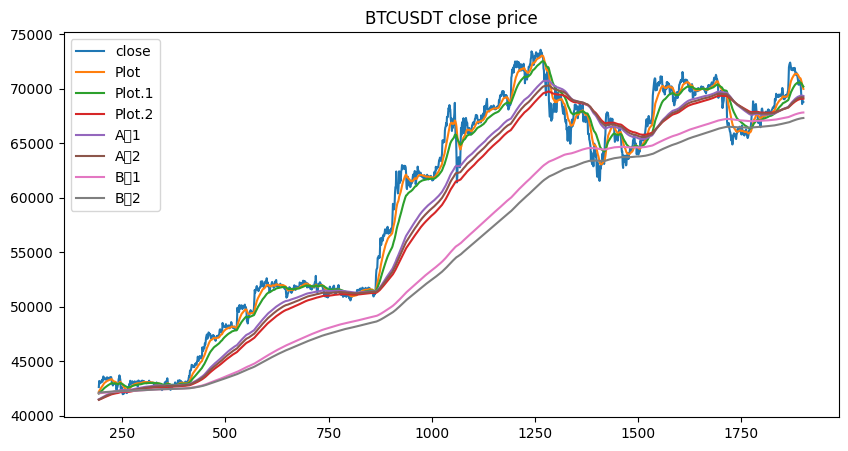

In [174]:
# Index(['time', 'open', 'high', 'low', 'close', 'Buy', 'Sell', 'Plot', 'Plot.1',
#        'Plot.2', 'A组1', 'A组2', 'B组1', 'B组2', 'Volume'],
#       dtype='object')
#plot all cols except 'open', 'high', 'low'
plt.figure(figsize=(10,5))
plt.plot(data1['close'])
plt.plot(data1['Plot'])
plt.plot(data1['Plot.1'])
plt.plot(data1['Plot.2'])
#A组 in the same color
plt.plot(data1['A组1'])
plt.plot(data1['A组2'])
#B组 in the same color
plt.plot(data1['B组1'])
plt.plot(data1['B组2'])

#plot Buy and Sell in upper and lower arrow on the close price
# plt.plot(data1['Buy'], 'g^')
# plt.plot(data1['Sell'], 'rv')

#add legend
plt.legend(['close','Plot','Plot.1','Plot.2','A组1','A组2','B组1','B组2'])

plt.title('BTCUSDT close price')
plt.show()







In [175]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the close line
fig.add_trace(go.Scatter(x=data1['time'], y=data1['close'], mode='lines', name='close'))

# Add other lines
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot'], mode='lines', name='Plot'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot.1'], mode='lines', name='Plot.1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot.2'], mode='lines', name='Plot.2'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['A组1'], mode='lines', name='A组1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['A组2'], mode='lines', name='A组2'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['B组1'], mode='lines', name='B组1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['B组2'], mode='lines', name='B组2'))

# Add the buy markers
fig.add_trace(go.Scatter(x=data1['time'][data1['Buy'] == 1], 
                         y=data1['close'][data1['Buy'] == 1], 
                         mode='markers', 
                         marker=dict(color='green', size=10, symbol='triangle-up'), 
                         name='Buy'))

# Add the sell markers
fig.add_trace(go.Scatter(x=data1['time'][data1['Sell'] == 1], 
                         y=data1['close'][data1['Sell'] == 1], 
                         mode='markers', 
                         marker=dict(color='red', size=10, symbol='triangle-down'), 
                         name='Sell'))

# Update layout
fig.update_layout(title='BTCUSDT with Buy/Sell marks', 
                  xaxis_title='time', 
                  yaxis_title='price')

# Show the plot
fig.show()


KeyError: 'Buy'

In [ ]:
#show rows where time NaT
data1[data1['time'].isnull()]
# drop rows where time NaT
data1 = data1.dropna(subset=['time'])
data1[data1['time'].isnull()]

,time,open,high,low,close,Plot,Plot.1,Plot.2,A组1,A组2,B组1,B组2,Volume


In [179]:
import pandas as pd

# Assuming data1 is your DataFrame
# Drop rows where time is NaT
data1 = data1.dropna(subset=['time'])

# Initialize the new column
data1['Largest_DropDown'] = False

# Iterate over the DataFrame rows
for i in range(len(data1)):
    current_price = data1['close'].iloc[i]
    # print(current_price)
    # Check if there are any lower prices after the current price
    if len(data1['close'].iloc[i+1:]) > 0:
        # print(data1['close'].iloc[i+1:])
        if current_price <= min(data1['low'].iloc[i+1:]):
            data1.at[data1.index[i], 'Largest_DropDown'] = True

# Count the number of True values
num_true_values = data1['Largest_DropDown'].sum()

# Print the number of True values
print(f'The number of times the price has dropped below the current price is: {num_true_values}')

#show the rows where Largest_DropDown is True
data1[data1['Largest_DropDown'] == True]



The number of times the price has dropped below the current price is: 3


,time,open,high,low,close,Plot,Plot.1,Plot.2,A组1,A组2,B组1,B组2,Volume,Largest_DropDown
413,2024-02-08 04:00:00+09:00,43650.95,43699.98,43431.10,43615.47,43184.113651,43054.163807,42803.715113,42907.735837,42861.787165,42548.010464,42532.353998,1492.80980,True
425,2024-02-08 16:00:00+09:00,44463.99,44545.99,44427.01,44513.24,44090.982378,43591.115070,42990.025401,43144.939086,43072.319556,42625.579122,42599.189576,805.39107,True
566,2024-02-14 13:00:00+09:00,49518.61,49584.55,49225.01,49385.99,49426.603215,49182.788103,47046.814289,47770.133938,47429.033196,44717.188868,44441.711699,827.14980,True


In [ ]:
#get the rows where Largest_DropDown is True, then count Buy and Sell in these rows
data1[data1['Largest_DropDown'] == True]['Buy'].sum(), data1[data1['Largest_DropDown'] == True]['Sell'].sum()

#get the rows where Largest_DropDown is True, count the percentage change in high and low in each row, the print in descending order
data1[data1['Largest_DropDown'] == True]['high'].pct_change().sort_values(ascending=False), data1[data1['Largest_DropDown'] == True]['low'].pct_change().sort_values(ascending=False)


KeyError: 'Buy'

In [180]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the close line
fig.add_trace(go.Scatter(x=data1['time'], y=data1['close'], mode='lines', name='close'))

# Add other lines
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot'], mode='lines', name='Plot'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot.1'], mode='lines', name='Plot.1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['Plot.2'], mode='lines', name='Plot.2'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['A组1'], mode='lines', name='A组1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['A组2'], mode='lines', name='A组2'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['B组1'], mode='lines', name='B组1'))
fig.add_trace(go.Scatter(x=data1['time'], y=data1['B组2'], mode='lines', name='B组2'))
# Add the buy markers
fig.add_trace(go.Scatter(x=data1['time'][data1['Largest_DropDown'] == True], 
                         y=data1['close'][data1['Largest_DropDown'] == True], 
                         mode='markers', 
                         marker=dict(color='green', size=10, symbol='triangle-up'), 
                         name='Buy'))
# Update layout
fig.update_layout(title='BTCUSDT with ThePriceThatNeverBeenLowerThenThis marks', 
                  xaxis_title='time', 
                  yaxis_title='price')

# Show the plot
fig.show()